In [114]:
%%time
import pandas as pd
import matplotlib.pyplot as plt
from read_data import df
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Wall time: 998 µs


In [ ]:
# df = df[:5] # short version for test
# df

убираем сложные поля утреннего и вечернего отчета, переименовываем вложенные поля, добиваемся плоской структуры данных

In [115]:
%%time
dfm = df['morning'].apply(pd.Series)
dfe = df['evening'].apply(pd.Series)
dfm.columns = 'm_' + dfm.columns
dfe.columns = 'e_' + dfe.columns

df = pd.concat([df.drop(['morning', 'evening'], axis=1),dfm, dfe], axis=1)
print(df.shape)
# df

(667, 50)
Wall time: 557 ms


In [116]:
df.dropna
print(df.shape)

(667, 50)


In [120]:
df.dtypes

day                       int64
month                     int64
year                      int64
store                    object
m_date_time_str          object
m_user                   object
m_small_toys              int64
m_medium_toys             int64
m_big_toys                int64
m_exchange                int64
m_bolls                   int64
m_sticks                  int64
m_sockets                 int64
m_pellet                  int64
m_candis                  int64
m_envelope                int64
m_reports                 int64
m_comment                object
m_ok_guns                object
m_bed_guns               object
m_mood                    int64
m_power_reserve           int64
m_plan                   object
m_0                      object
m_set                    object
e_date_time_str          object
e_user                   object
e_small_toys_up           int64
e_medium_toys_up          int64
e_big_toys_up             int64
e_small_toys_down         int64
e_medium

добавляем дополнительные столбцы с необходимыми данными

In [117]:
%%time
df['income'] = df['e_cash']+df['e_cashless']
df['date'] = pd.to_datetime(df.year*10000+df.month*100+df.day,format='%Y%m%d')

Wall time: 2.99 ms


In [119]:
%%time
df = df.set_index(['date'])

Wall time: 3.03 ms


In [66]:
import numpy as np
print(np.sort(df.m_user.unique()))
print(len(df.m_user.unique()))

['Адиля Галиева' 'Азалия Халикова' 'Айгуль Ф' 'Айсина Магсумова'
 'Алексей Нефедов' 'Алина Мингалеева' 'Алина мингалеева' 'Алия'
 'Алия Ганиева' 'Алия Сагатдинова' 'Алия ганиева' 'Альбина Малышева'
 'Анастасия Черкасова' 'Ангелина Вареник' 'Анжела Попова' 'Анжелика'
 'Анжелика Сабирова' 'Анна Ядринцева' 'Арина Галкина' 'Виктория Новикова'
 'Виктория новикова' 'Воробьева Анастасия' 'Диана Богданова'
 'Екатерина поскина' 'Иван Олейник' 'Ильназ Муртазин' 'Кристина Мартынова'
 'Лейсан Ахметова' 'Лена' 'Леся Алимова' 'Надежда'
 'Настя(запасной оператор)' 'Нло' 'Раиса Загидуллина' 'Регина'
 'Ринальд Ибрагимов' 'Сергей Кочкин' 'Эльза Садреева' 'Эльза садреева'
 'Юлдуз Бекмуратова' 'Юля Халикова']
41


In [67]:
df.m_user = df.m_user.str.strip().str.title()
for i in np.sort(df.m_user.unique()):
    print(i)
print(len(df.m_user.unique()))


Адиля Галиева
Азалия Халикова
Айгуль Ф
Айсина Магсумова
Алексей Нефедов
Алина Мингалеева
Алия
Алия Ганиева
Алия Сагатдинова
Альбина Малышева
Анастасия Черкасова
Ангелина Вареник
Анжела Попова
Анжелика
Анжелика Сабирова
Анна Ядринцева
Арина Галкина
Виктория Новикова
Воробьева Анастасия
Диана Богданова
Екатерина Поскина
Иван Олейник
Ильназ Муртазин
Кристина Мартынова
Лейсан Ахметова
Лена
Леся Алимова
Надежда
Настя(Запасной Оператор)
Нло
Раиса Загидуллина
Регина
Ринальд Ибрагимов
Сергей Кочкин
Эльза Садреева
Юлдуз Бекмуратова
Юля Халикова
37


In [10]:
%%time
# based on stackoverflow patricksurry answer https://stackoverflow.com/a/27802006
# grouped = (df
#     .groupby('store')                
#     .apply(lambda g:              
#         g[['income']]
#         .resample('W').mean()  # change resample argument
#         )
#     .unstack(level=0)  # pivot the store index rows to columns
#     # .fillna(0)
# )
# grouped.columns=grouped.columns.droplevel()
# grouped.plot(figsize=(10,10), title='усредненная по неделям выручка в разрезе тиров')


Wall time: 1.51 s


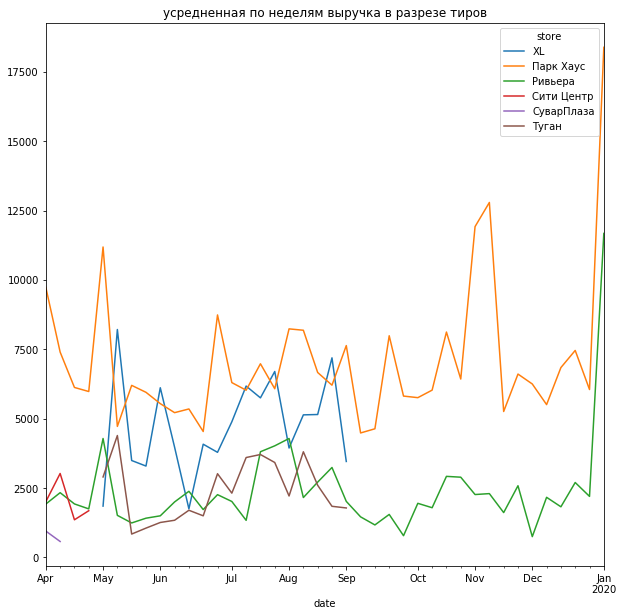

In [11]:
%%time
df.groupby(['store']).resample('W').mean()['income'].unstack(level=0)\
    .plot(legend=True, figsize=(10,10), title='усредненная по неделям выручка в разрезе тиров')

Wall time: 220 ms


m_user
Юля Халикова    AxesSubplot(0.125,0.2;0.775x0.68)
Name: income, dtype: object

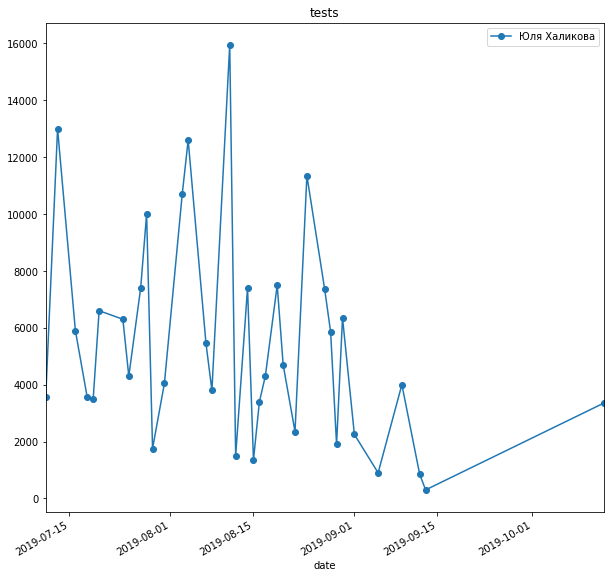

In [12]:
%%time
df[(df.m_user == 'Юля') | (df.m_user == 'Юля Халикова')]\
    .groupby(['m_user'])['income']\
    .plot(legend=True, figsize=(10,10), title='tests', style='o-')


Wall time: 507 ms


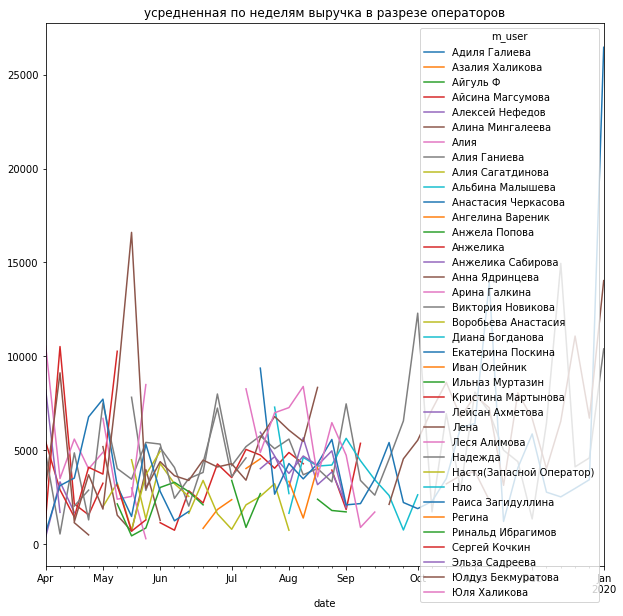

In [13]:
%%time
df.groupby(['m_user']).resample('W').mean()['income'].unstack(level=0)\
    .plot(legend=True, figsize=(10,10), title='усредненная по неделям выручка в разрезе операторов')

Wall time: 408 ms


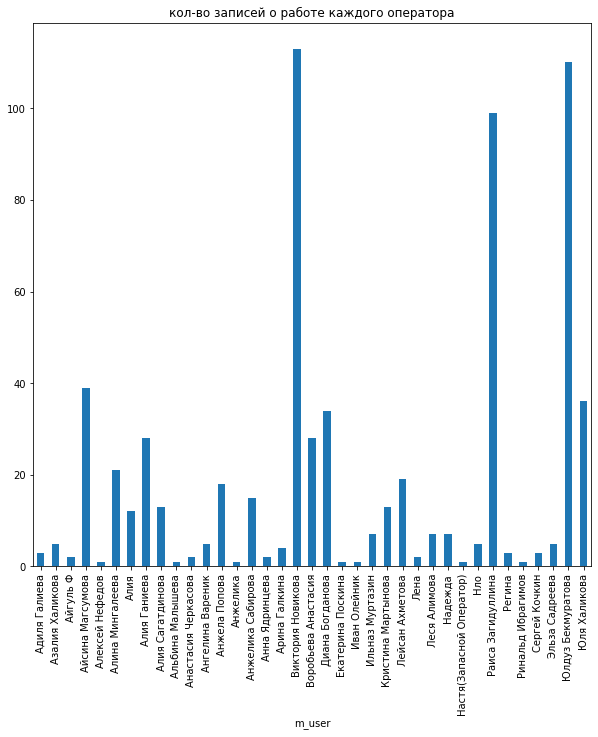

In [14]:
%%time
df.groupby(['m_user']).count()['income']\
    .plot(kind='bar', figsize=(10,10), title='кол-во записей о работе каждого оператора')

In [15]:
%%time
print(f"среднее кол-во записей про отдельного оператора: {df.groupby(['m_user']).count()['income'].mean():.1f}")
print(f"медиана кол-ва записей про отдельного оператора: {df.groupby(['m_user']).count()['income'].median():.1f}")

среднее кол-во записей про отдельного оператора: 18.0
медиана кол-ва записей про отдельного оператора: 5.0
Wall time: 9.97 ms


средняя выручка в разрезе точек и операторов

In [16]:
df.groupby(['store', 'm_user'])['income'].mean()

store  m_user           
XL     Азалия Халикова      4500.000000
       Айсина Магсумова     7075.000000
       Алия Ганиева         3633.333333
       Алия Сагатдинова     4991.666667
       Анжела Попова        3400.000000
                               ...     
Туган  Раиса Загидуллина    2666.666667
       Регина               3350.000000
       Сергей Кочкин        1716.666667
       Юлдуз Бекмуратова    3685.714286
       Юля Халикова         3165.000000
Name: income, Length: 105, dtype: float64

In [20]:
cross_corr = df.corr()

In [41]:
cross_corr.income.sort_values(ascending=False).iloc[:30]
    # .plot(kind='barh', figsize=(10,10), title='топ корреляций с сырым значением дохода:')

income                   1.000000
e_cash                   0.947495
e_cashless               0.869202
e_balance                0.744859
e_collection_spending    0.506598
e_is_it_a_good_day       0.358385
e_small_toys_win         0.317207
year                     0.315991
e_prepayment             0.297835
e_exchange               0.288070
m_exchange               0.287687
e_are_you_good           0.244403
e_big_toys               0.242493
m_big_toys               0.235433
m_bolls                  0.208153
m_candis                 0.191953
e_medium_toys_win        0.175178
e_medium_toys_down       0.110095
e_big_toys_down          0.096859
e_big_toys_wit           0.089822
m_mood                   0.076974
month                    0.064172
m_power_reserve          0.056844
m_small_toys             0.053304
e_small_toys_down        0.048133
m_sockets                0.034597
m_envelope               0.034597
e_small_toys             0.028342
m_sticks                 0.028300
m_pellet      

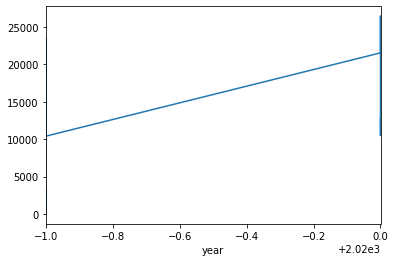

In [40]:
df.set_index('year').income.plot()

In [69]:
old_df = df

In [217]:
df = old_df

In [218]:
columns_to_research = ('income','day', 'month', 'year', 'store', 'm_user', 'm_small_toys', 'm_medium_toys', 'm_big_toys', 
                        'm_bolls', 'm_pellet', 'm_candis', 'm_mood', 'm_power_reserve', 'm_plan')

In [219]:
# оставляем только нужные колонки
df = df.reindex(columns=columns_to_research)

In [220]:
# конвертируем колонки в категории
df.store = pd.Categorical(df.store)
df.m_user = pd.Categorical(df.m_user)

In [221]:
from datetime import datetime
df = df.reset_index()
df['week_day'] = df['date'].apply(lambda x: x.weekday())
df = df.set_index(['date'])


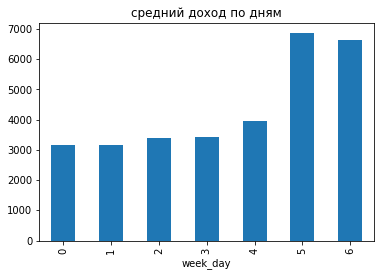

In [237]:
df.groupby(['week_day']).income.mean().plot(kind='bar', title='средний доход по дням')

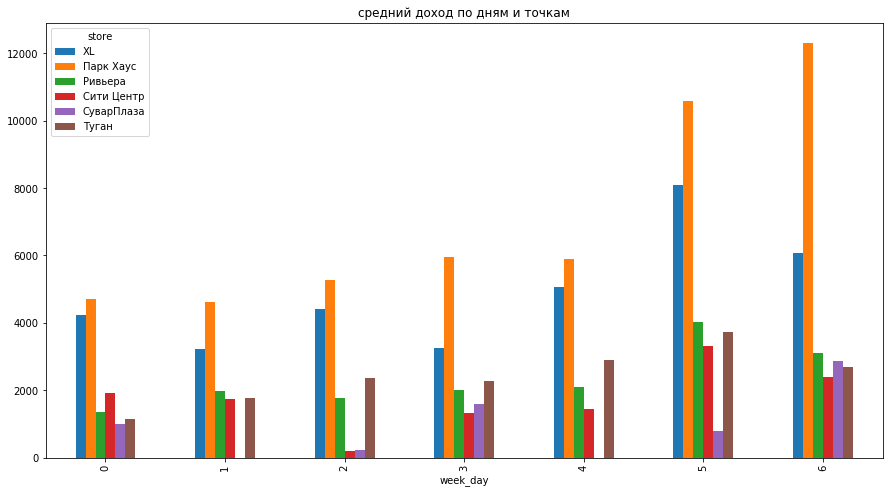

In [249]:
df.groupby(['week_day', 'store']).income.mean().unstack(level=1)\
    .plot(kind='bar', figsize=(15,8), title='средний доход по дням и точкам')

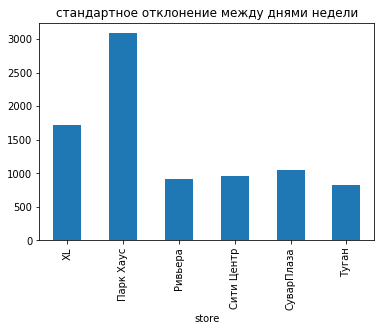

In [252]:
df.groupby(['week_day', 'store']).income.mean().unstack(level=1).std()\
    .plot(kind='bar',  title='стандартное отклонение дохода между днями недели')

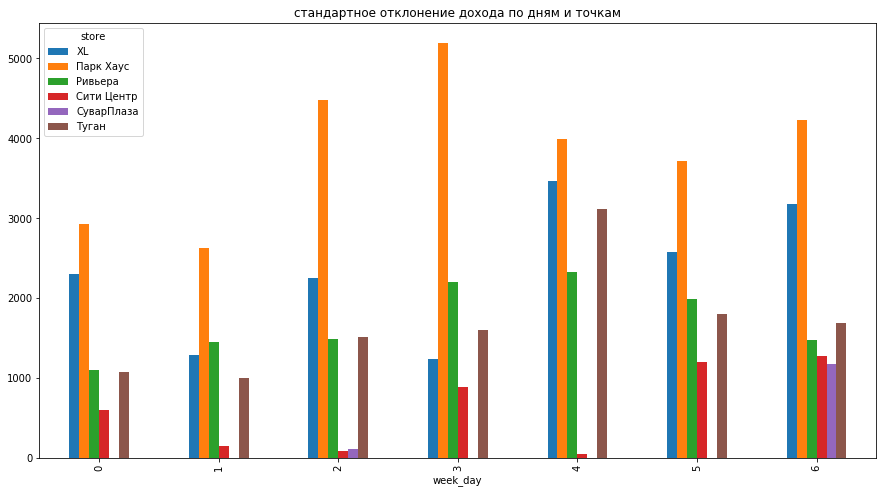

In [253]:
df.groupby(['week_day', 'store']).income.std().unstack(level=1)\
    .plot(kind='bar', figsize=(15,8), title='стандартное отклонение дохода по дням и точкам')

In [257]:
df.groupby(['week_day', 'store']).income.unstack(axis=0)\
    .plot(kind='box', figsize=(15,8), title='стандартное отклонение дохода по дням и точкам')

AttributeError: Cannot access callable attribute 'unstack' of 'SeriesGroupBy' objects, try using the 'apply' method

In [ ]:
df.groupby(['store']).boxplot(subplots=False, column=['income'])#.income\
#      .plot( figsize=(15,8), legend=True, title='')

In [293]:
type(df.groupby(['store']))

pandas.core.groupby.generic.DataFrameGroupBy

In [276]:
dd=pd.DataFrame(np.random.randn(5,5))
dd

,0,1,2,3,4
0,-1.692045,0.730556,1.264366,1.457048,-0.575786
1,1.253651,0.031868,0.090667,-1.902065,1.251771
2,-0.565485,0.027597,-0.569478,0.468158,0.157888
3,-1.556389,-2.248781,0.639744,-0.726075,-0.181432
4,0.536111,-0.798830,-0.280574,0.708996,-0.183678


In [279]:
dd.median()

0   -0.565485
1    0.027597
2    0.090667
3    0.468158
4   -0.181432
dtype: float64

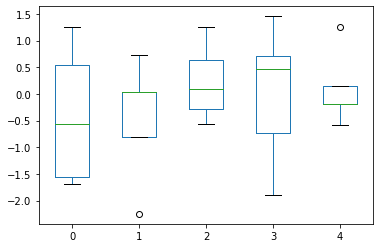

In [278]:
dd.plot(kind='box')